In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib

In [ ]:
figure_title = 'comparison_to_baselines'
rename_dict = {'LLN-ours': 'Ours', 
               'LLN-convFalse': 'Thiry',
               'LLN-random_patches': 'Random Patches',
               'CNN': 'Vanilla CNN'}

In [ ]:
df = pd.read_csv(f'./{figure_title}.csv')
df.head()

In [ ]:
xlabel = df.columns[0]
xs = df[xlabel].values

value_name = 'validate_no_aug_accuracy/dataloader_idx_1'
relevant_columns = [c for c in df.columns if c.endswith(value_name)]
df = df[relevant_columns]
df = df.rename(columns={c: c.replace(f' - {value_name}', '') for c in df.columns})
df = df.rename(columns=rename_dict)
df *= 100  # Convert from fraction to precentages
df.head()

In [ ]:
plt.figure()
plt.style.use("ggplot")
for c in df.columns:
    plt.plot(xs, df[c], label=c)
plt.xlabel(xlabel)
plt.ylabel('accuracy')
plt.title('Comparing our model to baselines')
plt.legend()
plt.grid(True)
tikzplotlib.save(f'{figure_title}.tex')

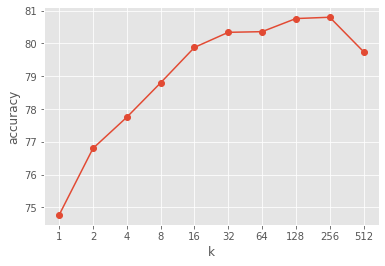

In [18]:
# Create accuracy per k plot
ys = [74.77, 76.8, 77.75, 78.8, 79.88, 80.34, 80.36, 80.76, 80.8, 79.75]

plt.figure()
plt.style.use("ggplot")
plt.plot(np.arange(1, len(ys)+1), ys, marker='o')
plt.xlabel('k')
plt.xticks(ticks=xs, labels=[    1,    2,     4,    8,    16,    32,    64,  128,   256,   512])
# plt.yticks(ticks=ys, labels=ys)
plt.ylabel('accuracy')
plt.grid(True)
tikzplotlib.save(f'acc_per_k.tex')